In [243]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np



In [244]:
data=pd.read_csv("C:/Users/jayjr/Downloads/train.csv")
data

,Unnamed: 0,Complaint_ID,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Timely response?
0,0,2535701,6/8/2017,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"Caliber Home Loans, Inc.",FL,34744,NaN,NaN,Fax,6/12/2017,Closed with explanation,NaN,Yes
1,1,3314889,7/22/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,On XX/XX/2019 all of my credit and debit cards...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,900XX,NaN,Consent provided,Web,7/22/2019,Closed with explanation,NaN,Yes
2,2,3612478,4/18/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I was made aware of a negative account and inq...,NaN,"EQUIFAX, INC.",CA,945XX,NaN,Consent provided,Web,4/18/2020,Closed with explanation,NaN,Yes
3,3,2069704,8/18/2016,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",TX,77014,NaN,NaN,Phone,8/19/2016,Closed with monetary relief,No,Yes
4,4,3354927,8/27/2019,Debt collection,Auto debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,Bridgecrest Acceptance Corporation,PA,19143,Servicemember,Consent not provided,Web,8/27/2019,Closed with explanation,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,3796247,8/13/2020,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company believes complaint is the result of an...,UNITED SERVICES AUTOMOBILE ASSOCIATION,GA,30116,NaN,NaN,Referral,8/14/2020,Closed with explanation,NaN,Yes
1048571,1048571,3933702,11/3/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,104XX,NaN,Other,Web,11/3/2020,Closed with explanation,NaN,Yes
1048572,1048572,3361930,8/30/2019,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95117,NaN,NaN,Referral,9/3/2019,Closed with explanation,NaN,Yes
1048573,1048573,4003293,12/10/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I spoke with XXXX at Experian on XX/XX/XXXX ab...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AZ,853XX,NaN,Consent provided,Web,12/10/2020,Closed with explanation,NaN,Yes


In [245]:
#data.drop(columns=['Unnamed: 0','Consumer complaint narrative','Tags','Consumer disputed?'],inplace=True)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Unnamed: 0                    1048575 non-null  int64 
 1   Complaint_ID                  1048575 non-null  int64 
 2   Date received                 1048575 non-null  object
 3   Product                       1048575 non-null  object
 4   Sub-product                   947674 non-null   object
 5   Issue                         1048575 non-null  object
 6   Sub-issue                     766056 non-null   object
 7   Consumer complaint narrative  310809 non-null   object
 8   Company public response       446648 non-null   object
 9   Company                       1048575 non-null  object
 10  State                         1027557 non-null  object
 11  ZIP code                      954841 non-null   object
 12  Tags                          129277 non-n

In [247]:
data['Product'].unique()

array(['Mortgage', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Bank account or service', 'Debt collection', 'Credit card',
       'Student loan', 'Credit reporting',
       'Money transfer, virtual currency, or money service',
       'Money transfers', 'Checking or savings account', 'Consumer Loan',
       'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Payday loan',
       'Prepaid card', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [248]:
data['Sub-product'].unique()

array(['Conventional home mortgage',
       'General-purpose credit card or charge card', 'Credit reporting',
       'Checking account', 'Auto debt',
       'Conventional adjustable mortgage (ARM)', nan, 'Other debt',
       'Other personal consumer report', 'Credit card debt',
       'Private student loan', 'Other mortgage', 'FHA mortgage',
       'Other bank product/service', 'Medical debt', 'I do not know',
       'Mobile or digital wallet', 'International money transfer',
       'Mortgage', 'Credit card', 'Other type of mortgage', 'Auto',
       'Federal student loan servicing', 'Installment loan',
       'Conventional fixed mortgage',
       'Other (i.e. phone, health club, etc.)',
       'Other banking product or service', 'Non-federal student loan',
       'Savings account', 'Federal student loan debt',
       'Home equity loan or line of credit (HELOC)', 'Loan',
       '(CD) Certificate of deposit', 'Title loan',
       'Private student loan debt', 'Payday loan', 'Medical',
   

In [249]:
data['Issue'].unique()

array(['Struggling to pay mortgage',
       'Problem with a purchase shown on your statement',
       'Incorrect information on your report', 'Deposits and withdrawals',
       'Took or threatened to take negative or legal action',
       'Loan modification,collection,foreclosure',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Customer service / Customer relations',
       "Problem with a company's investigation into an existing issue",
       'False statements or representation',
       'Dealing with your lender or servicer',
       'Incorrect information on credit report',
       'Loan servicing, payments, escrow account',
       'Attempts to collect debt not owed',
       'Problems caused by my funds being low',
       'Trouble during payment process',
       'Account opening, closing, or management', 'Closing on a mortgage',
       'Fraud or scam',
       'Threatened to contact someone or share information improperly',
       'Ot

In [250]:
data['Company public response'].unique()

array([nan,
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company chooses not to provide a public response',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       "Company can't verify or dispute the facts in the complaint",
       'Company believes the complaint is the result of a misunderstanding',
       'Company believes it acted appropriately as authorized by contract or law',
       "Company believes the complaint provided an opportunity to answer consumer's questions",
       'Company disputes the facts presented in the complaint',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure'],
      dtype=object)

In [251]:
len(data['Company'].unique())

4826

In [252]:
len(data['ZIP code'].unique())

20798

In [253]:
data['Consumer consent provided?'].unique()

array([nan, 'Consent provided', 'Consent not provided', 'Other',
       'Consent withdrawn'], dtype=object)

In [254]:
data['Submitted via'].unique()

array(['Fax', 'Web', 'Phone', 'Postal mail', 'Referral', 'Email'],
      dtype=object)

In [255]:
len(data['Date sent to company'].unique())

3351

In [256]:
len(data['Company response to consumer'].unique())

8

In [257]:
encode=LabelEncoder()

In [258]:
t=encode.fit_transform(data['Date received'])

In [259]:
data.drop(columns='Date received',inplace=True)

In [260]:
data['Date received']=t

In [261]:
t=encode.fit_transform(data['Product'])
data.drop(columns='Product',inplace=True)
data['Product']=t

In [262]:
t=encode.fit_transform(data['Issue'])
data.drop(columns='Issue',inplace=True)
data['Issue']=t

In [263]:
data.head()

,Unnamed: 0,Complaint_ID,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Timely response?,Date received,Product,Issue
0,0,2535701,Conventional home mortgage,NaN,NaN,NaN,"Caliber Home Loans, Inc.",FL,34744,NaN,NaN,Fax,6/12/2017,Closed with explanation,NaN,Yes,2569,10,139
1,1,3314889,General-purpose credit card or charge card,Credit card company isn't resolving a dispute ...,On XX/XX/2019 all of my credit and debit cards...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,900XX,NaN,Consent provided,Web,7/22/2019,Closed with explanation,NaN,Yes,2715,4,117
2,2,3612478,Credit reporting,Information belongs to someone else,I was made aware of a negative account and inq...,NaN,"EQUIFAX, INC.",CA,945XX,NaN,Consent provided,Web,4/18/2020,Closed with explanation,NaN,Yes,1852,6,75
3,3,2069704,Checking account,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",TX,77014,NaN,NaN,Phone,8/19/2016,Closed with monetary relief,No,Yes,2946,0,54
4,4,3354927,Auto debt,Threatened or suggested your credit would be d...,NaN,NaN,Bridgecrest Acceptance Corporation,PA,19143,Servicemember,Consent not provided,Web,8/27/2019,Closed with explanation,NaN,Yes,3039,7,146


In [264]:
t=encode.fit_transform(data['Submitted via'])
data.drop(columns='Submitted via',inplace=True)
data['Submitted via']=t

In [265]:
t=encode.fit_transform(data['Date sent to company'])
data.drop(columns='Date sent to company',inplace=True)
data['Date sent to company']=t

In [266]:
data.head()

,Unnamed: 0,Complaint_ID,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Company response to consumer,Consumer disputed?,Timely response?,Date received,Product,Issue,Submitted via,Date sent to company
0,0,2535701,Conventional home mortgage,NaN,NaN,NaN,"Caliber Home Loans, Inc.",FL,34744,NaN,NaN,Closed with explanation,NaN,Yes,2569,10,139,1,2300
1,1,3314889,General-purpose credit card or charge card,Credit card company isn't resolving a dispute ...,On XX/XX/2019 all of my credit and debit cards...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,900XX,NaN,Consent provided,Closed with explanation,NaN,Yes,2715,4,117,5,2669
2,2,3612478,Credit reporting,Information belongs to someone else,I was made aware of a negative account and inq...,NaN,"EQUIFAX, INC.",CA,945XX,NaN,Consent provided,Closed with explanation,NaN,Yes,1852,6,75,5,1817
3,3,2069704,Checking account,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",TX,77014,NaN,NaN,Closed with monetary relief,No,Yes,2946,0,54,2,2907
4,4,3354927,Auto debt,Threatened or suggested your credit would be d...,NaN,NaN,Bridgecrest Acceptance Corporation,PA,19143,Servicemember,Consent not provided,Closed with explanation,NaN,Yes,3039,7,146,5,2991


In [267]:
data['Sub-product'].fillna('ajajaja',inplace=True)

In [268]:
data['Sub-issue'].fillna('akakaka',inplace=True)

In [269]:
data['Consumer complaint narrative'].fillna('asasasa',inplace=True)

In [270]:
data['Company public response'].fillna('atatata',inplace=True)

In [271]:
data['State'].fillna('alalala',inplace=True)

In [272]:
data['ZIP code'].fillna('apapapa',inplace=True)

In [273]:
data['Tags'].fillna('aqaqaqa',inplace=True)

In [274]:
data['Consumer consent provided?'].fillna('ahahaha',inplace=True)

In [275]:
data['Company response to consumer'].fillna('adadada',inplace=True)

In [276]:
data['Consumer disputed?'].fillna('aoaoaoa',inplace=True)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Unnamed: 0                    1048575 non-null  int64 
 1   Complaint_ID                  1048575 non-null  int64 
 2   Sub-product                   1048575 non-null  object
 3   Sub-issue                     1048575 non-null  object
 4   Consumer complaint narrative  1048575 non-null  object
 5   Company public response       1048575 non-null  object
 6   Company                       1048575 non-null  object
 7   State                         1048575 non-null  object
 8   ZIP code                      1048575 non-null  object
 9   Tags                          1048575 non-null  object
 10  Consumer consent provided?    1048575 non-null  object
 11  Company response to consumer  1048575 non-null  object
 12  Consumer disputed?            1048575 non-

In [278]:
t=encode.fit_transform(data['Sub-product'])
data.drop(columns='Sub-product',inplace=True)
data['Sub-product']=t

In [279]:
t=encode.fit_transform(data['Sub-issue'])
data.drop(columns='Sub-issue',inplace=True)
data['Sub-issue']=t

In [280]:
t=encode.fit_transform(data['Consumer complaint narrative'])
data.drop(columns='Consumer complaint narrative',inplace=True)
data['Consumer complaint narrative']=t

In [281]:
t=encode.fit_transform(data['Company public response'])
data.drop(columns='Company public response',inplace=True)
data['Company public response']=t

In [282]:
t=encode.fit_transform(data['State'])
data.drop(columns='State',inplace=True)
data['State']=t

In [283]:
t=encode.fit_transform(data['ZIP code'])
data.drop(columns='ZIP code',inplace=True)
data['ZIP code']=t

In [284]:
t=encode.fit_transform(data['Tags'])
data.drop(columns='Tags',inplace=True)
data['Tags']=t

In [285]:
t=encode.fit_transform(data['Consumer consent provided?'])
data.drop(columns='Consumer consent provided?',inplace=True)
data['Consumer consent provided?']=t

In [286]:
t=encode.fit_transform(data['Company response to consumer'])
data.drop(columns='Company response to consumer',inplace=True)
data['Company response to consumer']=t

In [287]:
t=encode.fit_transform(data['Consumer disputed?'])
data.drop(columns='Consumer disputed?',inplace=True)
data['Consumer disputed?']=t

In [288]:
t=encode.fit_transform(data['Company'])
data.drop(columns='Company',inplace=True)
data['Comapany']=t

In [289]:
t=encode.fit_transform(data['Timely response?'])
data.drop(columns='Timely response?',inplace=True)
data['Timely response?']=t

<AxesSubplot:>

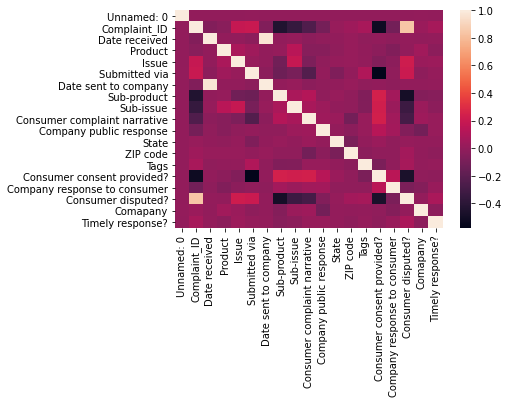

In [290]:
sns.heatmap(data.corr())

In [291]:
data.to_csv('train_final.csv')